In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n7/n711.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n703.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7015.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7017.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n709.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n712.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n710.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7012.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n713.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7011.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7016.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7010.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n706.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n717.jpg
/kaggle/input/10-mon

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
    
print(tf.test.is_gpu_available())

2.3.1
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0
False


In [4]:
train_dir = '/kaggle/input/10-monkey-species/training/training'
valid_dir = '/kaggle/input/10-monkey-species/validation/validation'
label_file = '/kaggle/input/10-monkey-species/monkey_labels.txt'

for p in train_dir, valid_dir, label_file:
    print(p, 'is exists: ', os.path.exists(p))

/kaggle/input/10-monkey-species/training/training is exists:  True
/kaggle/input/10-monkey-species/validation/validation is exists:  True
/kaggle/input/10-monkey-species/monkey_labels.txt is exists:  True


In [5]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [7]:
height = 224
width = 224
channels = 3
batch_size = 24
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = True,
    class_mode = 'categorical'
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = False,
    class_mode = 'categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [8]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0

In [11]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False, pooling='avg', weights = 'imagenet'))
resnet50_fine_tune.add(keras.layers.Dense(num_classes, activation='softmax'))
resnet50_fine_tune.layers[0].trainable = False

resnet50_fine_tune.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

resnet50_fine_tune.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
epochs = 10
history = resnet50_fine_tune.fit_generator(train_generator, 
                                           steps_per_epoch = train_num // batch_size, 
                                           epochs = epochs, 
                                           validation_data = valid_generator,
                                           validation_steps = valid_num // batch_size)

Epoch 1/10
45/45 [==============================] - 111s 2s/step - loss: 1.1001 - accuracy: 0.6927 - val_loss: 0.4244 - val_accuracy: 0.9356
Epoch 2/10
45/45 [==============================] - 108s 2s/step - loss: 0.3228 - accuracy: 0.9488 - val_loss: 0.2396 - val_accuracy: 0.9583
Epoch 3/10
45/45 [==============================] - 108s 2s/step - loss: 0.2158 - accuracy: 0.9600 - val_loss: 0.1739 - val_accuracy: 0.9583
Epoch 4/10
31/45 [===================>..........] - ETA: 26s - loss: 0.1741 - accuracy: 0.9634

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


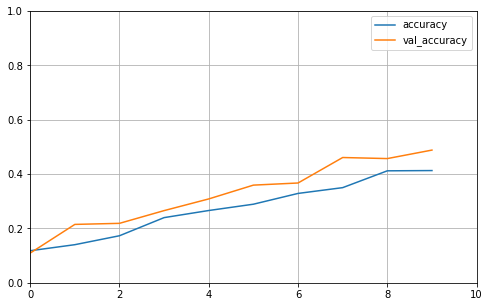

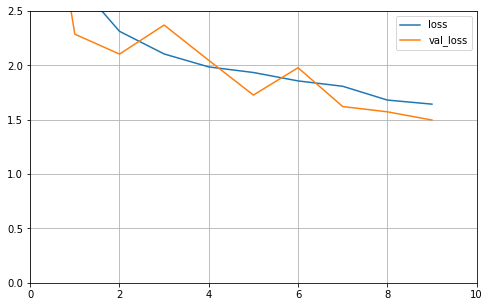

In [13]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2.5)

In [ ]:
resnet50 = keras.applications.ResNet50(include_top=False, poolings='avg', weights='imagenet')
resnet50.summary()

In [ ]:
for layer in resnet50.layers[0:-5]:
    layer.trainable = False
    
resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes, activation='softmax'),
])

resnet50_new.compile(loss='categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])

resnet50_new.summary()

In [ ]:
epochs = 10
history = resnet50_new.fit_generator(train_generator, 
                                     steps_per_epoch = train_num // batch_size, 
                                     epochs = epochs, 
                                     validation_data = valid_generator,
                                     validation_steps = valid_num // batch_size)

plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2.5)